<img src="figuras/mbit-logo.png" align="right" style="float" width="200">
<font color="#CA3532"><h1 align="left">Clustering</h1></font>
<h2 align="left">Clustering jerárquico</h2>

Primero importamos las librerías que necesitaremos. También activaremos el modo *inline* para los gráficos generados por *matplotlib*. También inicializaremos la semilla del generador de números aleatorios.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from numpy import linalg
from matplotlib.patches import Ellipse
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

Ahora crearemos un problema no supervisado sintético. El objetivo es entender los conceptos principales con este prolema, luego analizaremos bases de datos reales. Usaremos la función "make_blobs" que genera datos con un número especificado de "blobs". Esta función escoge aleatoriamente los centros de los blobs.

Los parámetros que cambiaremos se comentan aquí:

## Funciones para crear y dibujar los datos en el problema de los clusters elipsoidales

In [2]:
def rota_datos_alrededor_origen(X, angulo):
    angle_rad = angulo*2.0*np.pi/360.0

    s = np.sin(angle_rad)
    c = np.cos(angle_rad)
    matriz_rotacion = np.array([[c,-s],[s,c]])
    X_rotados = np.dot(matriz_rotacion, X) # se rotan los puntos generados

    return X_rotados

def genera_puntos_gaussiana2D(Npuntos, media, std1, std2, angulo):
    X = np.random.randn(2, Npuntos)
    X[0,:] = X[0,:] * std1 # se multiplica cada atributo por la
    X[1,:] = X[1,:] * std2 # desviación estándar deseada
    X = rota_datos_alrededor_origen(X, angulo)
    X[0,:] = media[0] + X[0,:]
    X[1,:] = media[1] + X[1,:]

    return X.T

def genera_puntos_disco2D(Npuntos, media, radio):
    radios  = radio*np.sqrt(np.random.rand(Npuntos))
    angulos = (2*np.pi)*np.random.rand(Npuntos)
    X = np.zeros((Npuntos,2))
    X[:,0] = media[0] + radios*np.cos(angulos)
    X[:,1] = media[1] + radios*np.sin(angulos)
    return X

def plot_ellipsoid(mean, cov, color, splot, alpha=0.5):
    v, w = linalg.eigh(cov)
    u = w[0] / linalg.norm(w[0])
    angle = np.arctan(u[1] / u[0])
    angle = 180 * angle / np.pi  # convert to degrees
    ell = Ellipse(mean, v[0]*2, v[1]*2, 180 + angle, color=color)
    ell.set_clip_box(splot.bbox)
    ell.set_alpha(alpha)
    splot.add_artist(ell)

def plot_ellipsoid_from_data(X, color, splot, alpha=0.5):
    plot_ellipsoid(np.mean(X.T, axis=1), np.cov(X.T), color, splot, alpha)

## A continuación vamos a realizar un clustering aglomerativo

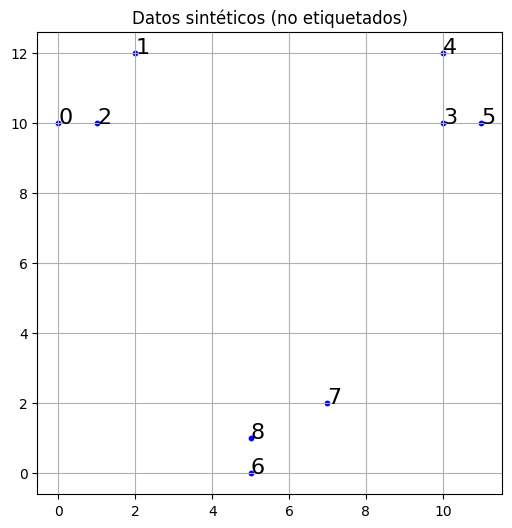

In [3]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Number of samples per component:
n_samples = 3

# Generate random sample, three components:
np.random.seed(0)
X1 = genera_puntos_gaussiana2D(n_samples, [0, 0], 1, 1, 45)
X2 = genera_puntos_gaussiana2D(n_samples, [10, 0], 1, 1, 45)
X3 = genera_puntos_gaussiana2D(n_samples, [5, -10], 1, 1, 0)
X  = np.concatenate((X1, X2, X3))

X  = np.array([[0,10], [2,12], [1,10], [10,10], [10,12], [11,10], [5,0], [7,2], [5,1]])

plt.figure(figsize=(6,6))
plt.scatter(X[:,0], X[:,1], color = 'b', s=10)
for i,Xi in enumerate(X):
    plt.text(Xi[0], Xi[1], str(i), fontsize=16)
plt.grid()
plt.title('Datos sintéticos (no etiquetados)');

In [4]:
np.sqrt(5)

2.23606797749979

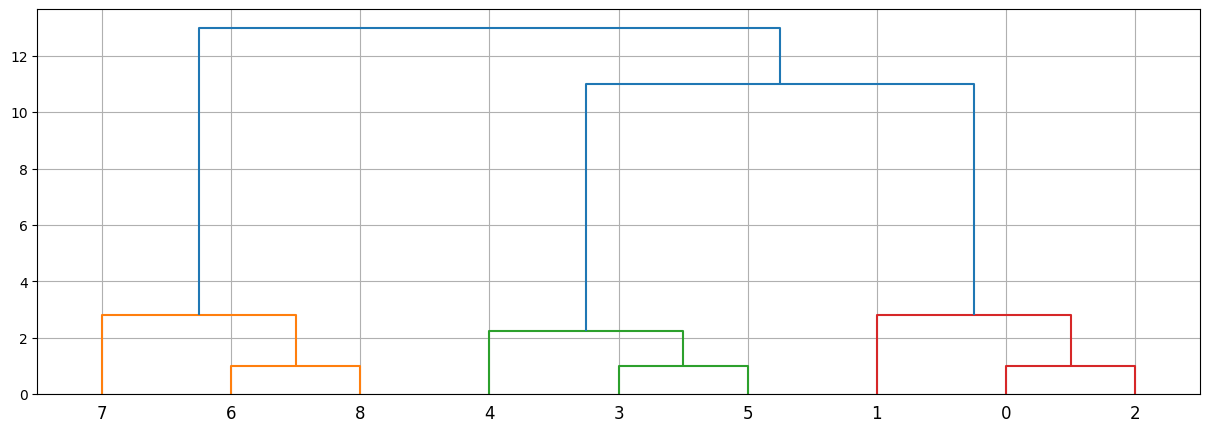

In [5]:
# Hierarchichal clustering, single-linkage:
Z = linkage(X, 'complete') # single, complete, average

# Plot the dendrogram:
plt.figure(figsize=(15, 5))
dendrogram(Z, leaf_rotation=0)
plt.grid(True)

In [6]:
print(Z) # id cluster 1, id cluster2, distance, num. points

[[ 0.          2.          1.          2.        ]
 [ 3.          5.          1.          2.        ]
 [ 6.          8.          1.          2.        ]
 [ 4.         10.          2.23606798  3.        ]
 [ 1.          9.          2.82842712  3.        ]
 [ 7.         11.          2.82842712  3.        ]
 [12.         13.         11.          6.        ]
 [14.         15.         13.          9.        ]]


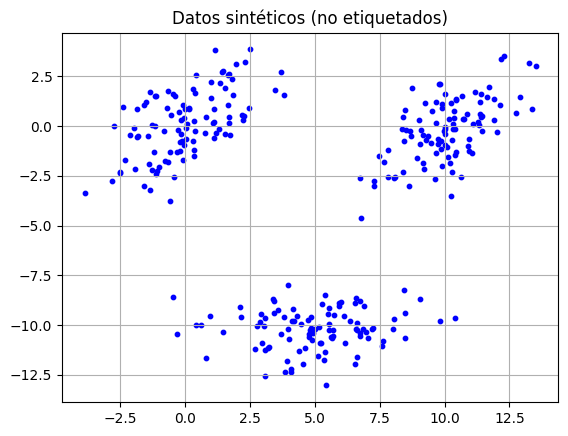

In [7]:
# Number of samples per component:
n_samples = 100

# Generate random sample, three components:
np.random.seed(0)
X1 = genera_puntos_gaussiana2D(n_samples, [0, 0], 2, 1, 45)
X2 = genera_puntos_gaussiana2D(n_samples, [10, 0], 2, 1, 45)
X3 = genera_puntos_gaussiana2D(n_samples, [5, -10], 2, 1, 0)
X = np.concatenate((X1, X2, X3))

plt.scatter(X[:,0], X[:,1], color = 'b', s=10)
plt.grid()
plt.title('Datos sintéticos (no etiquetados)');

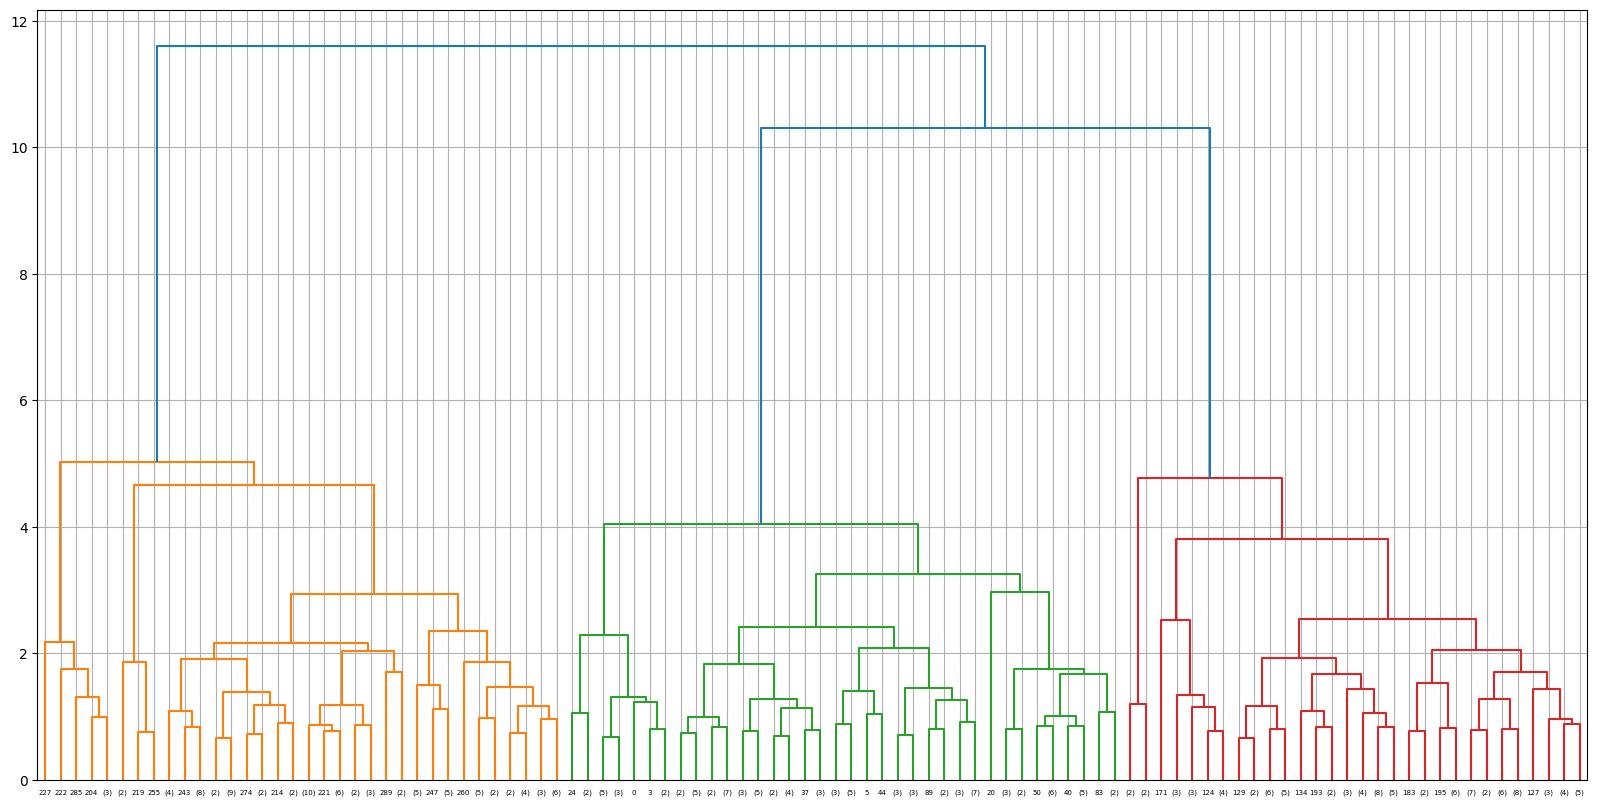

In [8]:
# Hierarchichal clustering, single-linkage:
Z = linkage(X, 'average')

# Plot the dendrogram:
plt.figure(figsize=(20, 10))
#dendrogram(Z, leaf_rotation=0)
#dendrogram(Z, leaf_rotation=0, color_threshold=4.0)
dendrogram(Z, leaf_rotation=0, truncate_mode='lastp', p=100)
plt.grid(True)

In [9]:
# Get the final clusters:
clusters = fcluster(Z, 6.0, # altura donde ponemos el corte: 6.0
                    criterion='distance')
print('n clusters:', len(np.unique(clusters)))
clusters

n clusters: 3


array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], d

In [10]:
# alternative:
clusters = fcluster(Z, 3, criterion='maxclust') # "quiero 3 clusters como máximo"
print('n clusters:', len(np.unique(clusters)))
clusters

n clusters: 3


array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], d

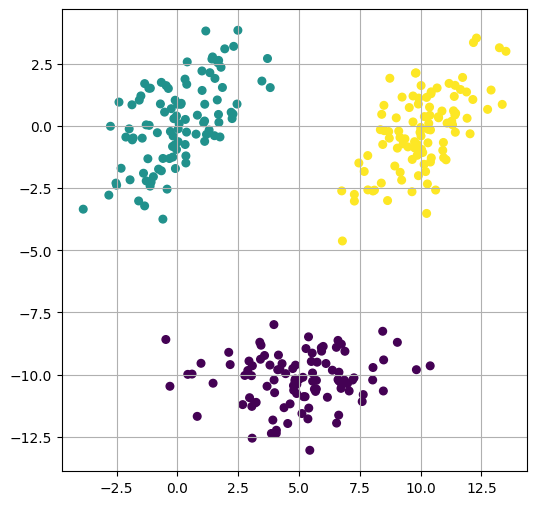

In [11]:
# Plot the clusters:
plt.figure(figsize=(6, 6))
plt.scatter(X[:,0], X[:,1], c=clusters, s=30)
plt.grid(True)
plt.show()

### Finding automatically the number of clusters

In [15]:
#from sklearn.metrics import silhouette_score as qmetric
from sklearn.metrics import calinski_harabasz_score as qmetric

Nclusters_max = 15

qualities = []
labels_sets = []
for k in range(1,Nclusters_max+1):
    labels = fcluster(Z, k, criterion='maxclust')
    labels_sets.append(labels)
    if k >1:
        qualities.append(qmetric(X, labels))
    else:
        qualities.append(0)

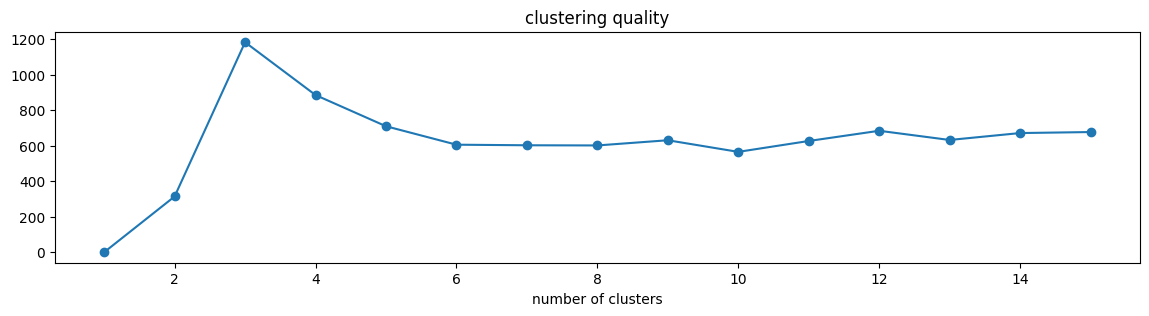

In [16]:
fig = plt.figure(figsize=(14,3))

plt.plot(range(1,Nclusters_max+1), qualities, marker='o')
plt.xlabel('number of clusters')
plt.title('clustering quality')
plt.show()

best = pd.Series(qualities).idxmax() # get index for the best model
labels = labels_sets[best]
n_clusters = len(np.unique(labels))

In [14]:
n_clusters

3